In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [111]:
df = pd.read_csv('heart.csv')

In [112]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#EDA

In [113]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [114]:
df.shape

(918, 12)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [116]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [117]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [118]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

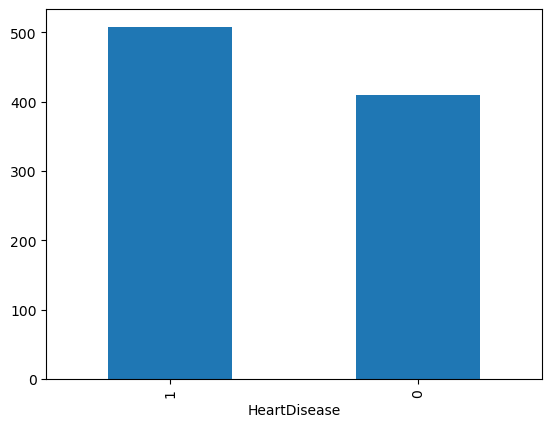

In [119]:
df['HeartDisease'].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

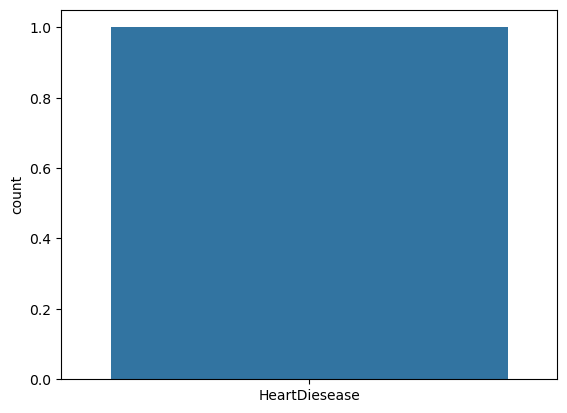

In [120]:
sns.countplot(x=['HeartDiesease'])

In [121]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

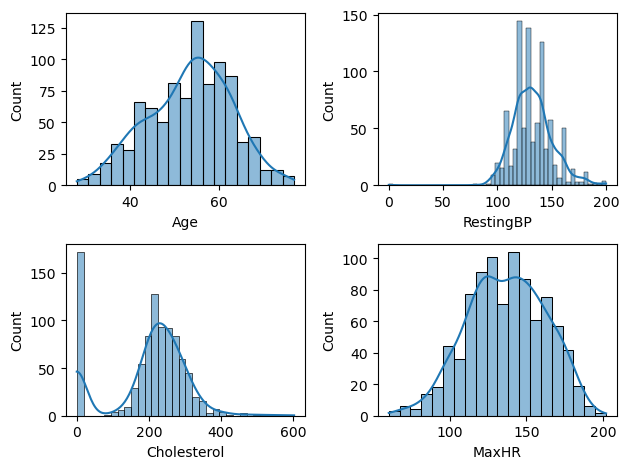

In [122]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [123]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [124]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [125]:
ch_mean

np.float64(244.6353887399464)

In [126]:
Re_mean = df.loc[df['RestingBP'] != 0,'RestingBP'].mean()

In [127]:
Re_mean

np.float64(132.54089422028352)

In [128]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol']=df['Cholesterol'].round(2)

In [129]:
df['RestingBPl'] = df['RestingBP'].replace(0,ch_mean)
df['RestingBPl']=df['RestingBP'].round(2)

In [130]:
pip install sheryanalysis==0.1.0

Note: you may need to restart the kernel to use updated packages.


In [131]:
import sheryanalysis as sh
sh.analyze(df)


🔍 Basic Analysis Report
------------------------------------------------------------
📏 Shape: (918, 13)
🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'RestingBPl']

✅ No null values found

🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBPl']


{'shape': (918, 13),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease',
  'RestingBPl'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('int64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64'),
  'RestingBPl': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0,
  'RestingBPl': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina'

<Axes: xlabel='ChestPainType', ylabel='count'>

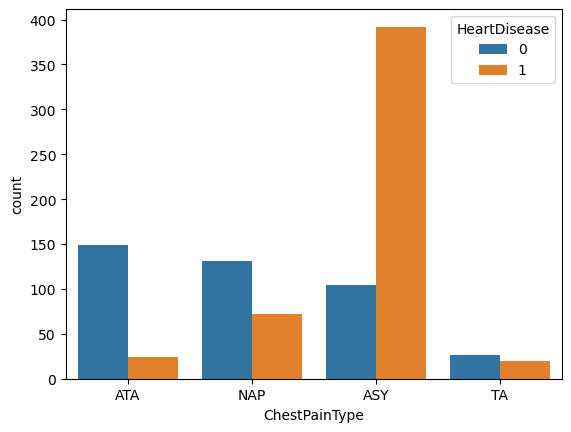

In [132]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='Sex', ylabel='count'>

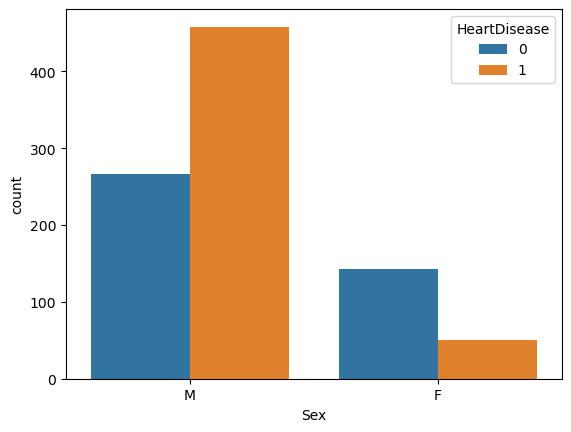

In [133]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

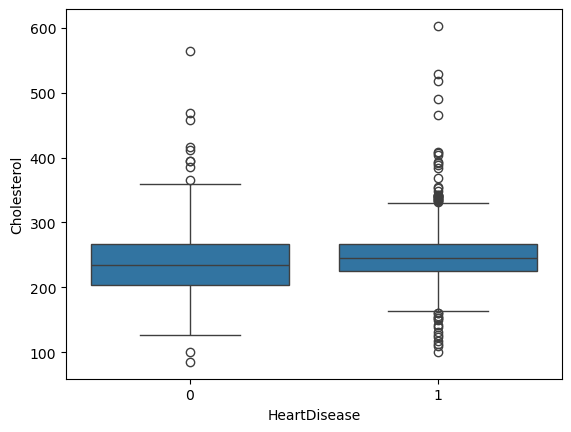

In [134]:
sns.boxplot(x=df['HeartDisease'],y=df['Cholesterol'],data = df)

<Axes: >

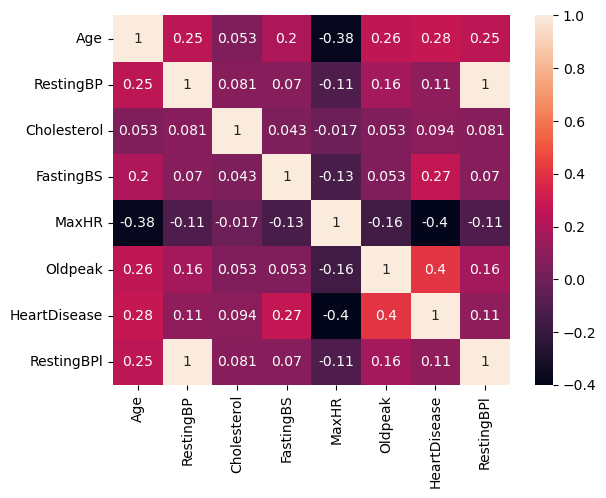

In [135]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Data Preprocessing And Cleaning

In [136]:
df_encode = pd.get_dummies(df,drop_first=True)

In [137]:
df_encode = df_encode.astype(int)

In [138]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBPl,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,140,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,160,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,130,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,138,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,150,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,110,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,144,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,130,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,130,0,1,0,0,0,0,0,1,0


In [139]:
df_encode.columns


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'RestingBPl', 'Sex_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [140]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestingBPl,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,140,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,160,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,130,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,138,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,150,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,110,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,144,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,130,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,130,0,1,0,0,0,0,0,1,0


In [141]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [142]:
X = df_encode.drop('HeartDisease',axis = 1)
y = df_encode['HeartDisease']

In [143]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [144]:
scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [151]:
models = {
    "Logistic Regression" : LogisticRegression(),
    "Naive Bayes" : GaussianNB(),
    "Deccision Tree": DecisionTreeClassifier(),
    "SVM" : SVC(),
    "KNN" : KNeighborsClassifier()
}

In [152]:
results = []


In [153]:
for name,model in models.items() :
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    f1 =  f1_score(y_test,y_pred)
    results.append({
        "model" : name,
        "Accuracy" : round(acc,4),
        "f1 score" : round(f1,4)
    })
    

In [154]:
results

[{'model': 'Logistic Regression', 'Accuracy': 0.8641, 'f1 score': 0.8804},
 {'model': 'Naive Bayes', 'Accuracy': 0.8533, 'f1 score': 0.8683},
 {'model': 'Deccision Tree', 'Accuracy': 0.7663, 'f1 score': 0.7923},
 {'model': 'SVM', 'Accuracy': 0.8478, 'f1 score': 0.8679},
 {'model': 'KNN', 'Accuracy': 0.8587, 'f1 score': 0.8762}]

In [156]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,"scaler.pkl")
joblib.dump(X.columns.tolist(),"columns.pkl")


['columns.pkl']